In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('transaction_dataset.csv')

In [2]:
# Display the first few rows of the dataset to get an overview
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Unnamed: 0  Index                                     Address  FLAG   
0           0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0  \
1           1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2           2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3           3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4           4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx   
0                    844.26                       1093.71  \
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx   
0                                704785.63       721            89  \
1                  

In [3]:
# Display basic information about the dataset (like number of rows, columns, and data types)
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                        

In [4]:
# Show summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
        Unnamed: 0        Index         FLAG  Avg min between sent tnx   
count  9841.000000  9841.000000  9841.000000               9841.000000  \
mean   4920.000000  1815.049893     0.221421               5086.878721   
std    2840.996333  1222.621830     0.415224              21486.549974   
min       0.000000     1.000000     0.000000                  0.000000   
25%    2460.000000   821.000000     0.000000                  0.000000   
50%    4920.000000  1641.000000     0.000000                 17.340000   
75%    7380.000000  2601.000000     0.000000                565.470000   
max    9840.000000  4729.000000     1.000000             430287.670000   

       Avg min between received tnx  Time Diff between first and last (Mins)   
count                   9841.000000                             9.841000e+03  \
mean                    8004.851184                             2.183333e+05   
std                    23081.714801               

In [5]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0                                                 0
Index                                                      0
Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                         

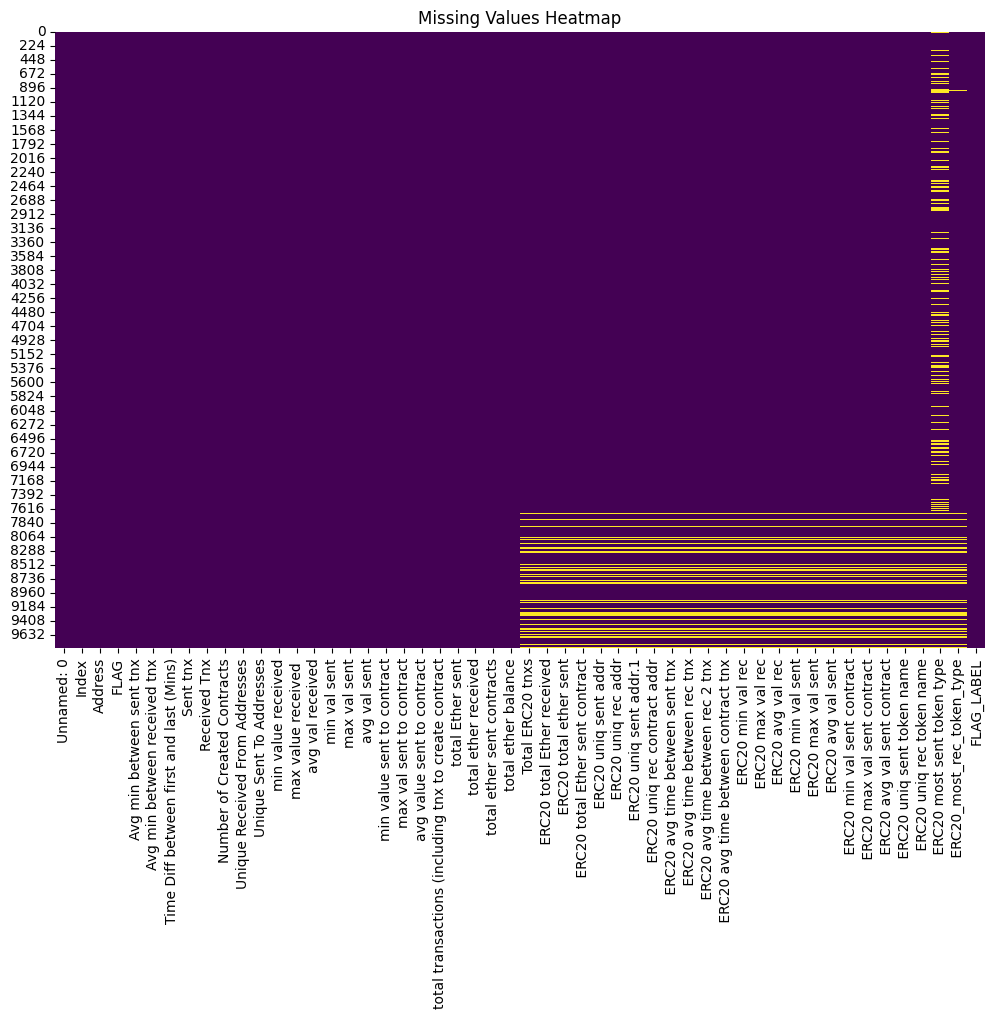

In [58]:
plt.figure(figsize=(12, 8))  # Increase figure size
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")

# Save the plot as a PNG image with better layout settings
plt.savefig('missing_values_heatmap.png', format='png', dpi=500, bbox_inches='tight')  # Use bbox_inches='tight' to fit plot
plt.show()

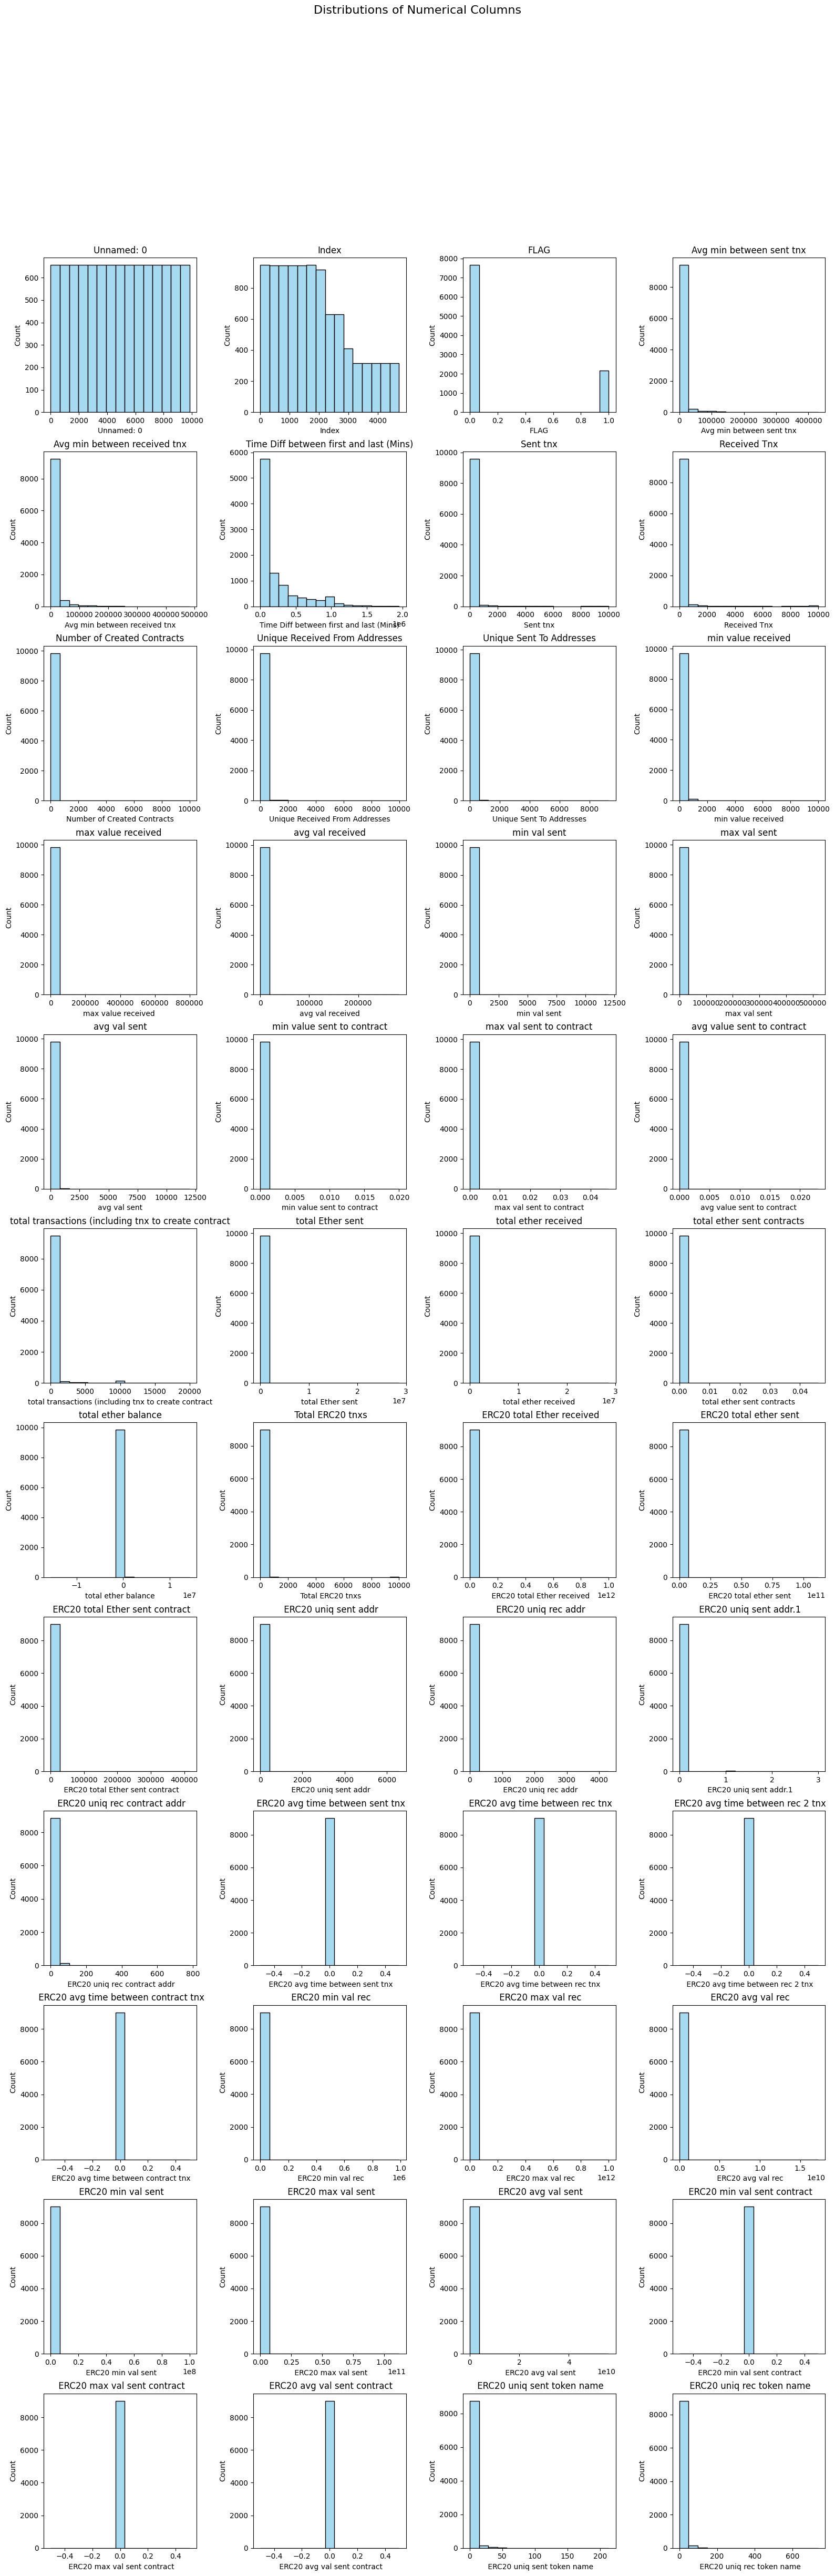

In [18]:
import math

# Determine the number of numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
num_cols = len(numerical_columns)

# Set up the figure with 4 columns per row
cols_per_row = 4
rows = math.ceil(num_cols / cols_per_row)
fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, rows * 4))
fig.suptitle("Distributions of Numerical Columns", fontsize=16, y=1.02)

# Flatten axes array for easy iteration if more than 1 row
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=15, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(col)

# Hide any empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust top to make room for suptitle
plt.show()

In [19]:
numerical_df = df.select_dtypes(include=[np.number])  # Select only numerical columns
correlation_matrix = numerical_df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
                                                    Unnamed: 0     Index   
Unnamed: 0                                            1.000000  0.299357  \
Index                                                 0.299357  1.000000   
FLAG                                                  0.719153 -0.316268   
Avg min between sent tnx                             -0.022847  0.006141   
Avg min between received tnx                         -0.089393  0.041309   
Time Diff between first and last (Mins)              -0.185789  0.093342   
Sent tnx                                             -0.057103  0.030468   
Received Tnx                                         -0.050315  0.037318   
Number of Created Contracts                          -0.005023  0.021667   
Unique Received From Addresses                       -0.016921  0.013848   
Unique Sent To Addresses                             -0.033909  0.017448   
min value received                                   -0.021266  0.0

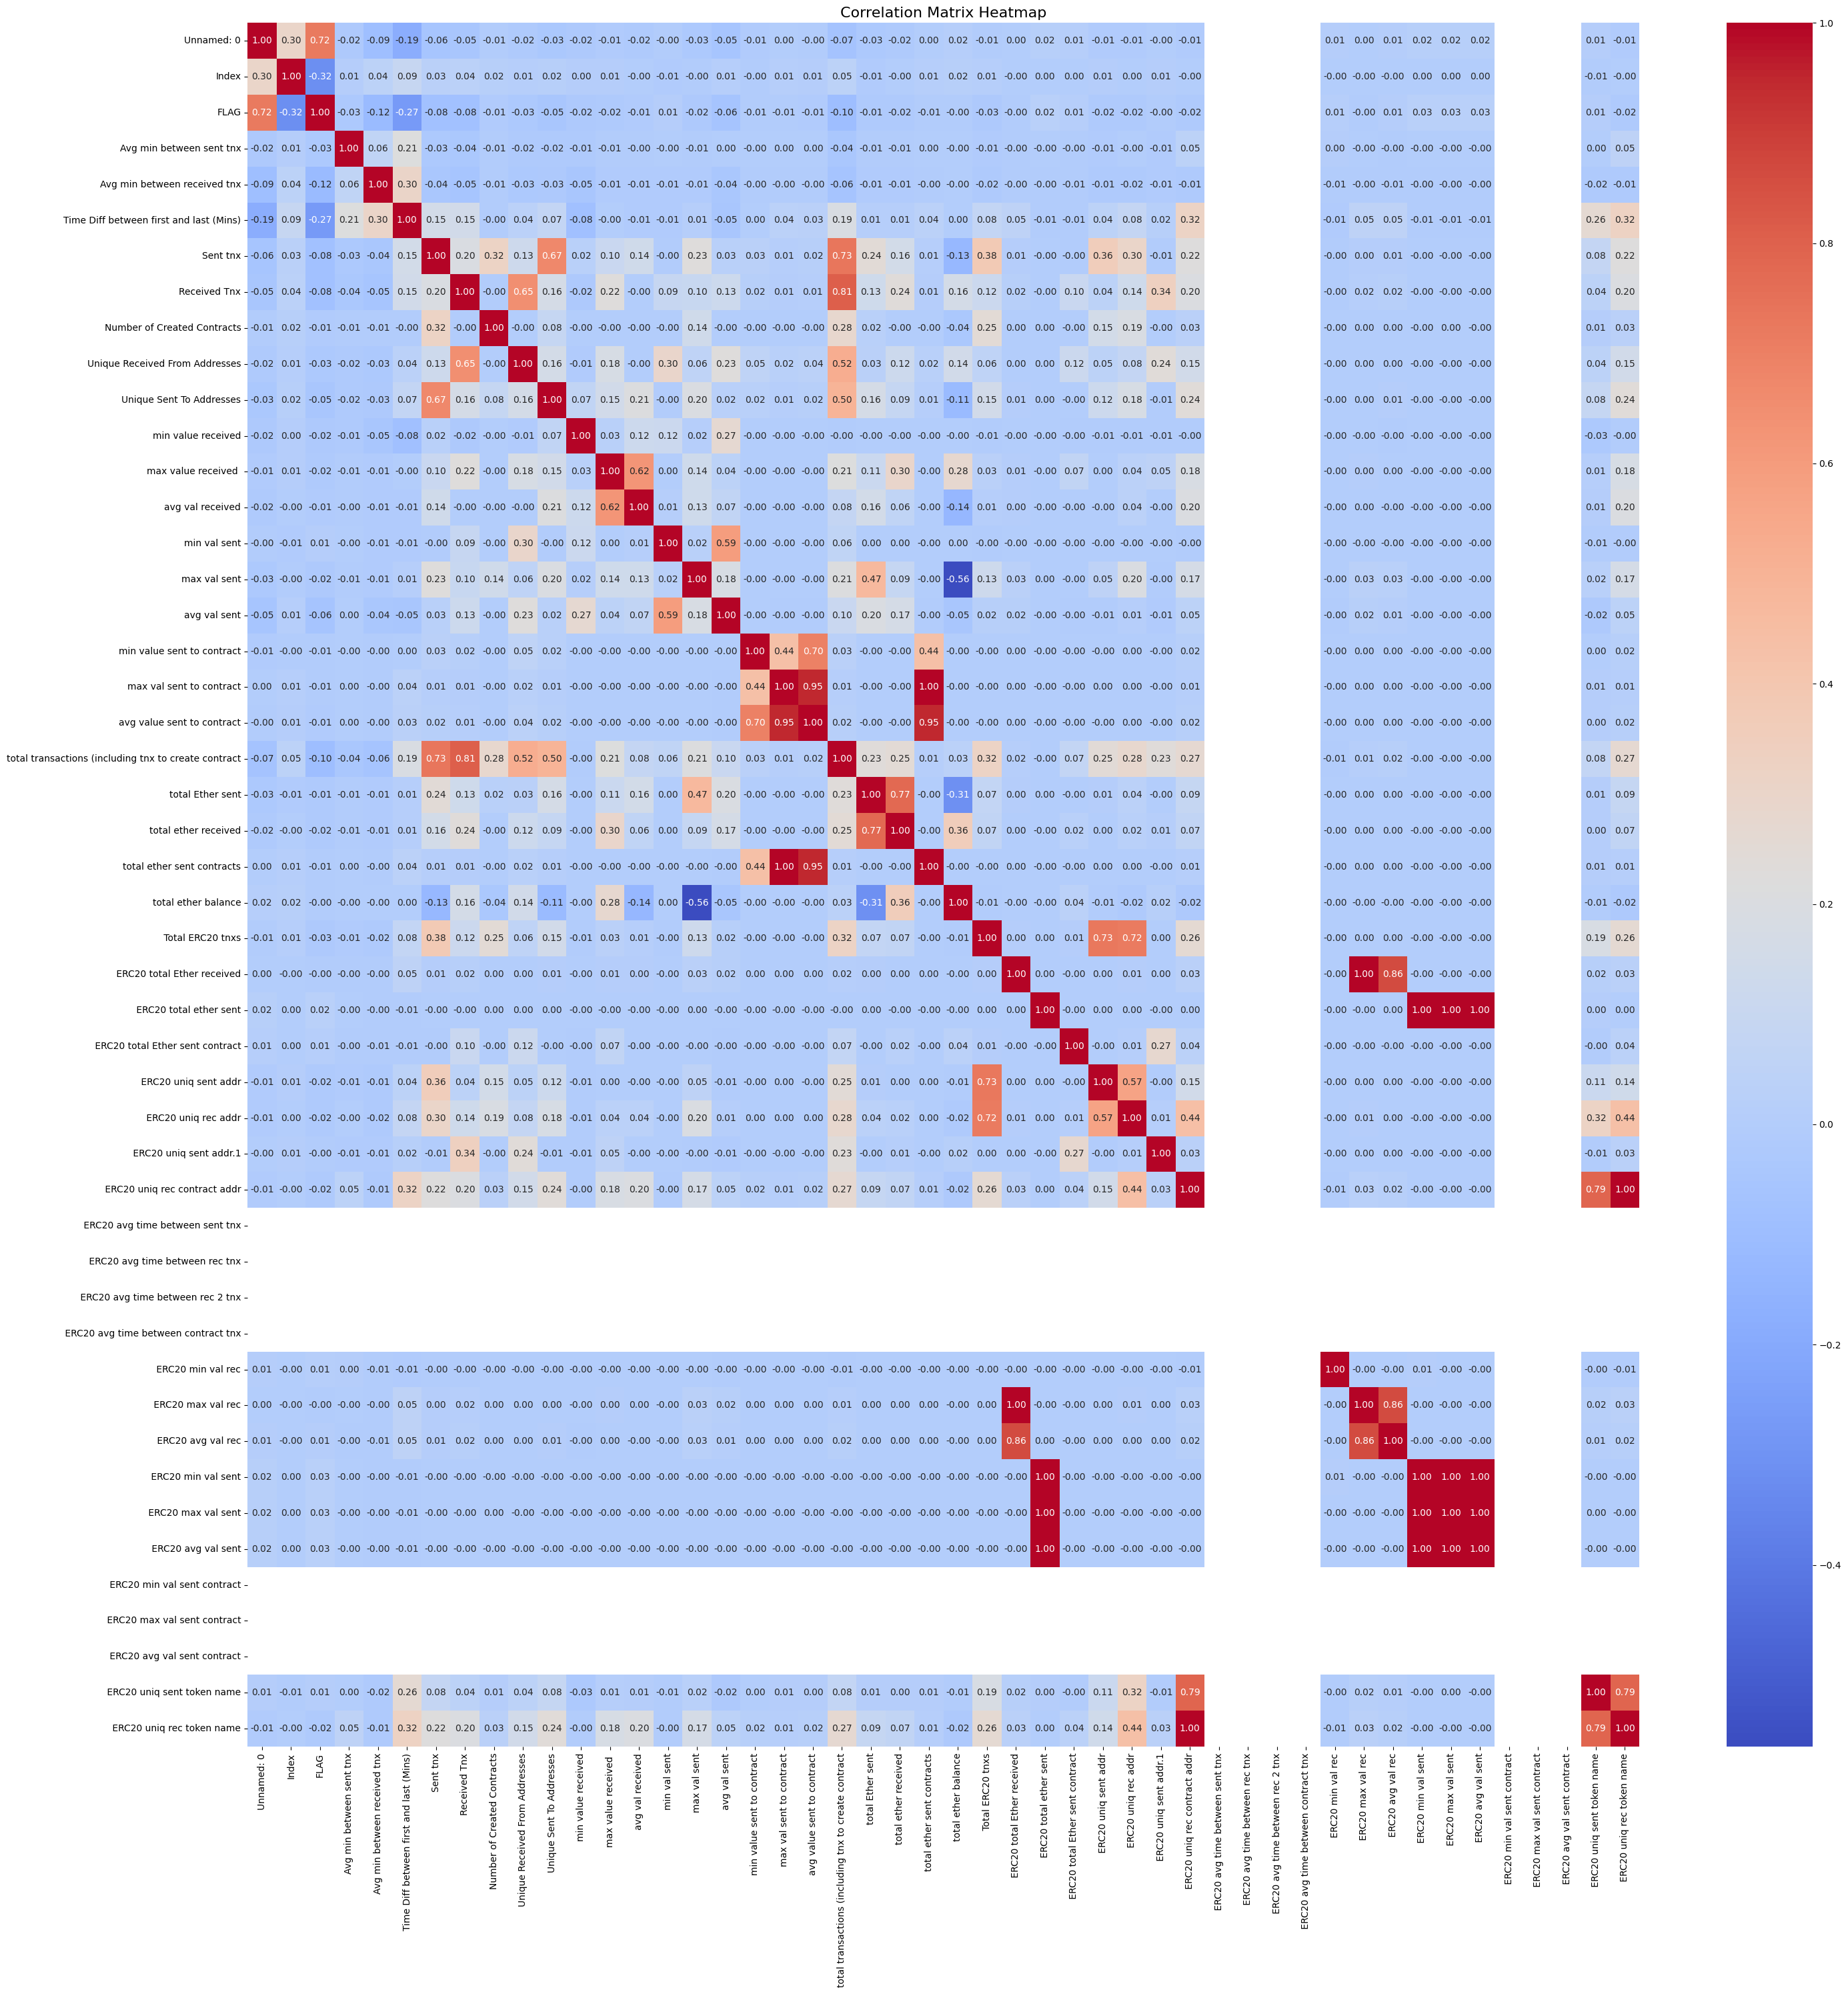

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (replace 'your_file.csv' with your actual file)
df = pd.read_csv('transaction_dataset.csv')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set up the figure size
plt.figure(figsize=(30, 30))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

C:\Users\97433\AppData\Local\Temp\ipykernel_31276\32853026.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set3", ax=axes[i])  # Specify the subplot to draw on
C:\Users\97433\AppData\Local\Temp\ipykernel_31276\32853026.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set3", ax=axes[i])  # Specify the subplot to draw on
C:\Users\97433\AppData\Local\Temp\ipykernel_31276\32853026.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set3", ax=axes[i])  # Specify 

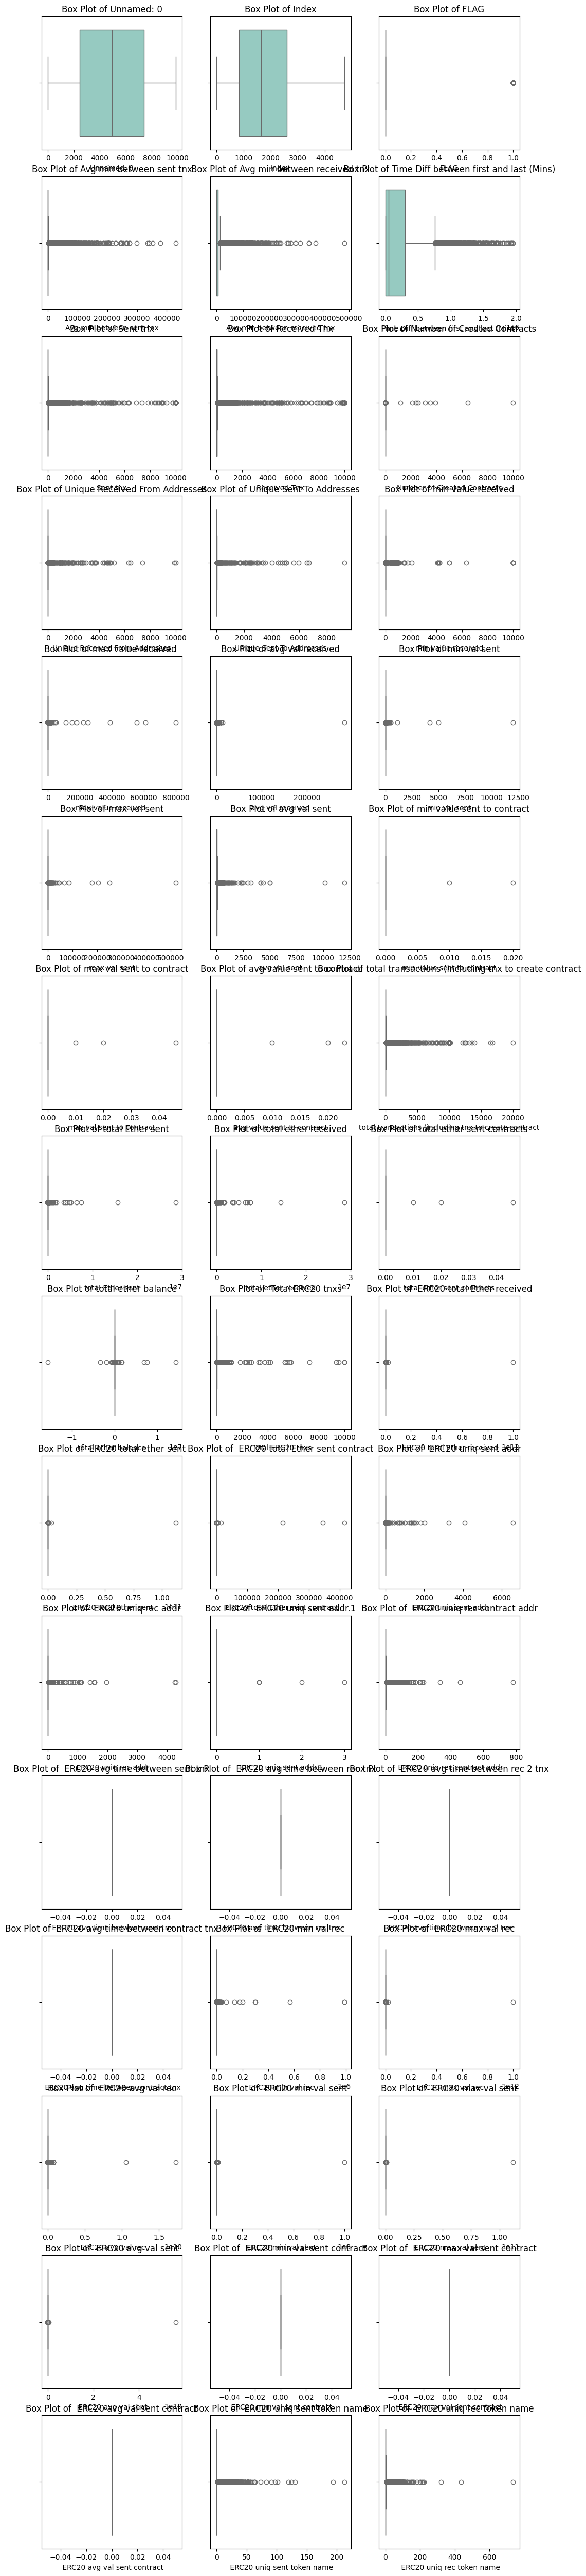

In [63]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Determine the number of rows and columns for the subplots
num_cols = 3  # You can adjust the number of columns based on how you want to arrange the plots
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, palette="Set3", ax=axes[i])  # Specify the subplot to draw on
    axes[i].set_title(f"Box Plot of {col}")
    
# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.savefig('boxplot_heatmap.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

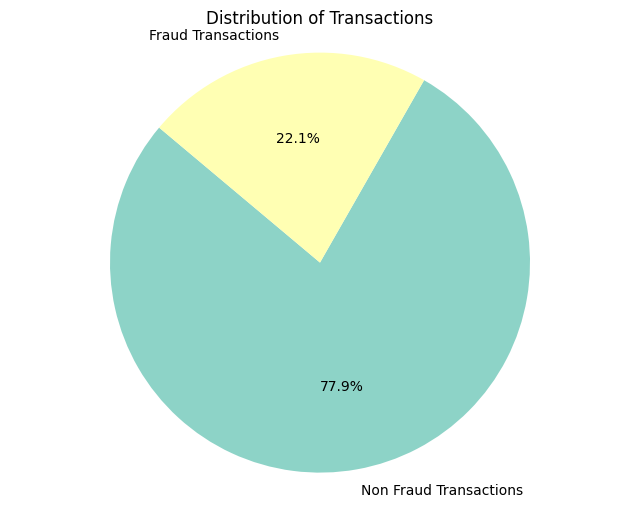

In [64]:
if 'FLAG' in df.columns:
    # Map FLAG values to descriptive labels
    flag_labels = {0: "Non Fraud Transactions", 1: "Fraud Transactions"}
    df['FLAG_LABEL'] = df['FLAG'].map(flag_labels)

    # Count the occurrences of each label
    flag_counts = df['FLAG_LABEL'].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(flag_counts, labels=flag_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
    plt.title("Distribution of Transactions")
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.savefig("distributions_of_transactions.png", format='png', dpi=500, bbox_inches='tight')
    plt.show()
else:
    print("The FLAG column does not exist in the DataFrame.")